## 텍스트 마이닝
#### KoNLPy 패키지
- jdk 필요
- 의존성 패키지 jpype1
- 한국어 정보처리를 위한 패키지 konlpy

#### re.sub(pattern, repalce, text)
##### 정규식
- 한글: [가-힣]
- 영문대문자: [A-Z]
- 영문소문자: [a-z]
- 영문자: [A-Za-z]
- 숫자: [0-9]

In [1]:
pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import konlpy
from wordcloud import WordCloud
import PIL
import konlpy

# hannanum 만들기
hannanum = konlpy.tag.Hannanum()

# Kkma 만들기
kkma = konlpy.tag.Kkma()

In [50]:
#data 불러오기
president_speech = open('Data2/speech_yoon.txt', encoding = 'UTF-8').read()
#한글 외 문자 제거
president_speech = re.sub('[^가-힣]', ' ', president_speech)

In [12]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [11]:
# 형태소와 종류까지 추출하기 (N 명사, J 조사 등)
hannanum.pos("대한민국의 영토는 한반도와 그 부속도서로 한다")

[('대한민국', 'N'),
 ('의', 'J'),
 ('영토', 'N'),
 ('는', 'J'),
 ('한반도', 'N'),
 ('와', 'J'),
 ('그', 'M'),
 ('부속도서', 'N'),
 ('로', 'J'),
 ('하', 'P'),
 ('ㄴ다', 'E')]

In [13]:
# 명사 추출하기
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [14]:
# 형태소 단위로 추출하기
hannanum.morphs("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '의', '영토', '는', '한반도', '와', '그', '부속도서', '로', '하', 'ㄴ다']

In [51]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(president_speech)
nouns[:20]

['국민',
 '말씀',
 '존경',
 '국민',
 '여러분',
 '월초',
 '공직',
 '후',
 '들',
 '나라',
 '앞날',
 '걱정',
 '나라',
 '것',
 '천안함',
 '청년',
 '전준영',
 '분노',
 '청년',
 '이찬호']

In [52]:
# 데이터 프레임으로 변환
df_word = pd.DataFrame( {'word' : nouns})
df_word

,word
0,국민
1,말씀
2,존경
3,국민
4,여러분
...,...
646,국민
647,여러분
648,우리
649,수


In [53]:
# 글자 수(count) 파생 변수 추가
df_word['word_n'] = df_word['word'].str.len()
# 단어 중 2글자 이상의 단어만 남기기
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')
# 단어 빈도 구하기
df_word = df_word.groupby('word', as_index=False) \
.agg(n = ('word', 'count')) \
.sort_values('n', ascending=False)
df_word

,word,n
36,국민,22
175,우리,13
208,자유,13
37,국민들,9
59,나라,9
...,...,...
119,사명,1
120,사유,1
121,사유화,1
122,사이,1


<AxesSubplot:xlabel='n', ylabel='word'>

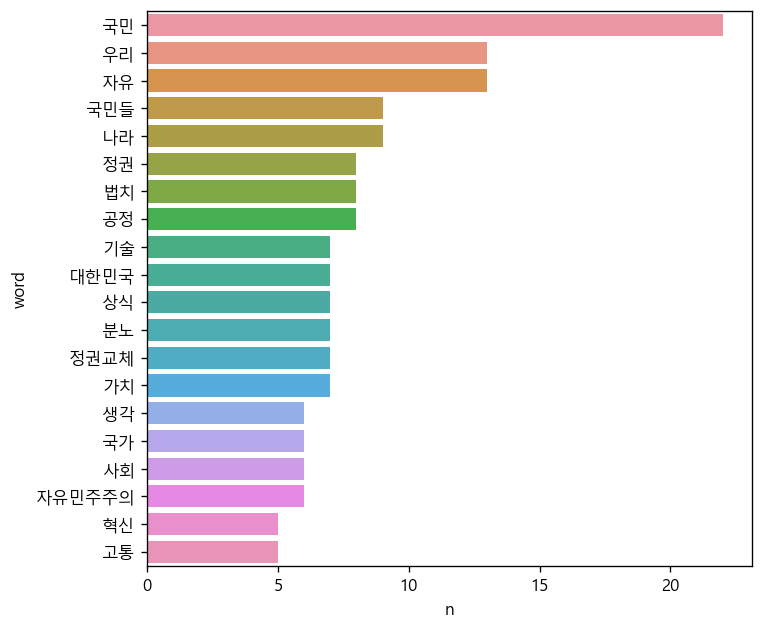

In [54]:
top20 = df_word.head(20)
plt.rcParams.update( {'font.family' : 'malgun Gothic', # 한글 폰트
'figure.dpi' : '120', # 해상도
'figure.figsize' : [6.5, 6]}) # 가호, 세로 크기
sns.barplot(data=top20, y='word', x='n')

In [27]:
font = 'Data2/DoHyeon-Regular.ttf'
#DataFrame을 dictionary로 변경
dic_word = df_word.set_index('word').to_dict()['n']

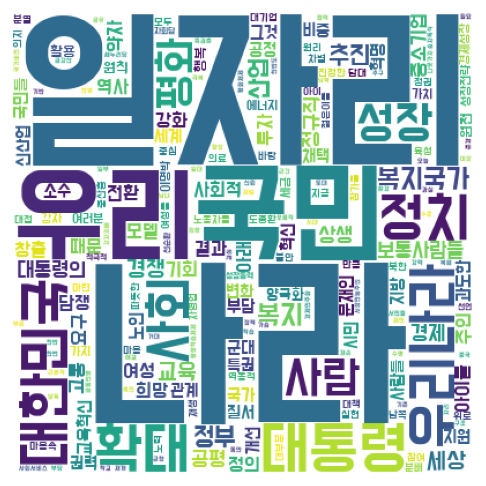

In [28]:
# wc 만들기
wc = WordCloud(random_state = 1234, #난수고정, 항상 같은모양으로 생성
              font_path = font,
              width = 400,
              height = 400,
              background_color='white')
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
plt.figure(figsize = (5, 5)) # 액자 사이즈
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)

In [30]:
# 구름 이미지 불러오기, 배경이 투명해야 함
# 구름 모양의 이미지 경계가 뚜렸한 png 파일
# 마스크가 될 이미지 파일 불러오기
icon = PIL.Image.open('Data2/cloud1.png')
print(f'이미지 파일 이름 : {icon.filename}')
print(f'이미지 파일 형식 : {icon.format}')
print(f'이미지 파일 크기 : {icon.size}')
print(f'이미지 색상 모드 : {icon.mode}')
print(f'이미지 가로 크기 : {icon.width}')
print(f'이미지 세로 크기 : {icon.height}')

이미지 파일 이름 : Data2/cloud1.png
이미지 파일 형식 : PNG
이미지 파일 크기 : (1000, 800)
이미지 색상 모드 : RGB
이미지 가로 크기 : 1000
이미지 세로 크기 : 800


In [31]:
icon.show()

In [33]:
# mask 파일 생성
img = np.array(icon)
# wc 만들기
wc = WordCloud(random_state=1234,
               font_path = font,
               width = 400,
               height = 400,
               contour_width=3,
               contour_color='steelblue',
               background_color='white',
               mask = img)
type(wc)

wordcloud.wordcloud.WordCloud

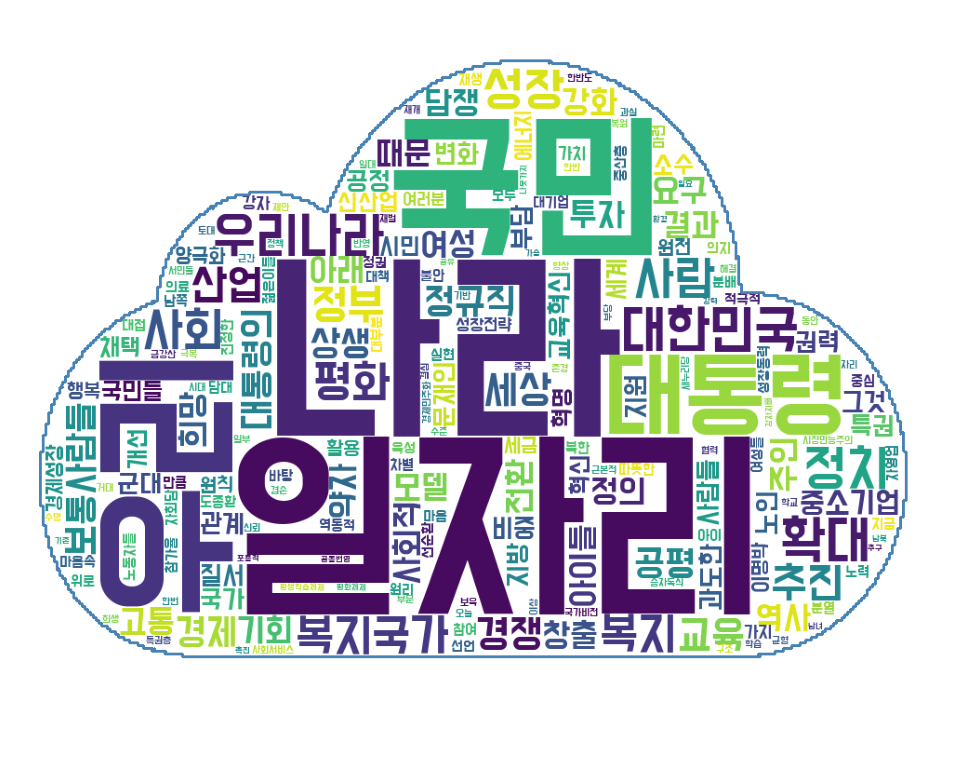

In [34]:
# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

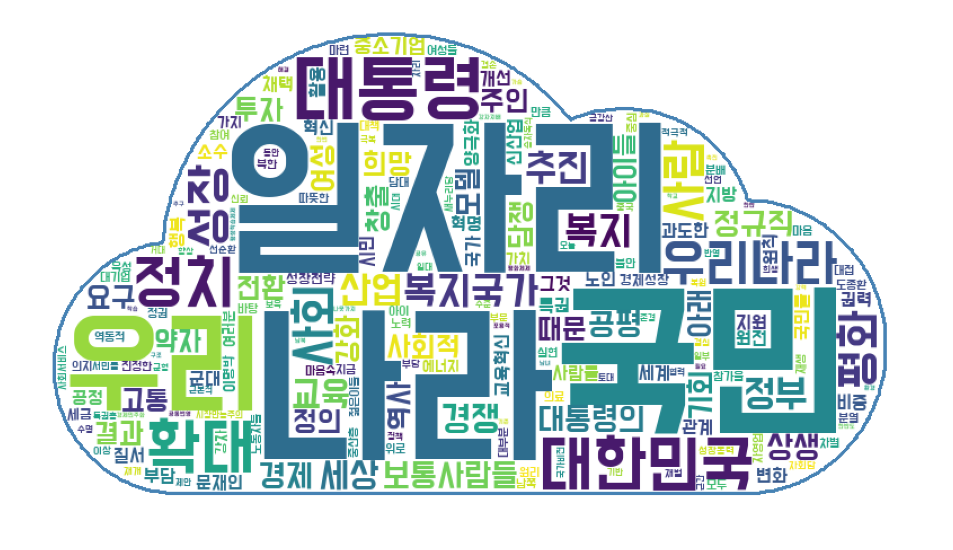

In [36]:
#투명 바탕에 까만 구름이 있는 경우
icon = PIL.Image.open('Data2/cloud.png')
# 흰색 캔버스 만들기
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
#노란 캔버스 만들기 (붙이려는 이미지)
yellow = PIL.Image.new('RGB', icon.size, (255, 255, 0))
# image 두개를 붙이는 방법
#원래 이미지 : playground
#자르고자 하는 img: dog
#자르고 싶은 모양의 mask : dogshape
#playground.paste(dog, dogshape)
#1) 노란색 캔버스를 구름 모양으로 mask 하여, 생성된 노란색 구름을 하얀 캔버스에 붙임
img.paste(yellow, icon)
#2) 첫번째 파라미터인 icon(검정색 구름 image를(cloud.png))를 두번째 파라미터인 icon 이
#하얀색 캔버스(img)에 붙임
#img.show()
#icon.show()
#img.paste(icon, icon)
#img.show()

# mask 파일 생성
img = np.array(img)

# wc 만들기
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
contour_width=3, # 테두리 굵기
contour_color='steelblue', # 테두리 색
background_color = 'white',
mask = img) # 배경으로 사용할 이미지

# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

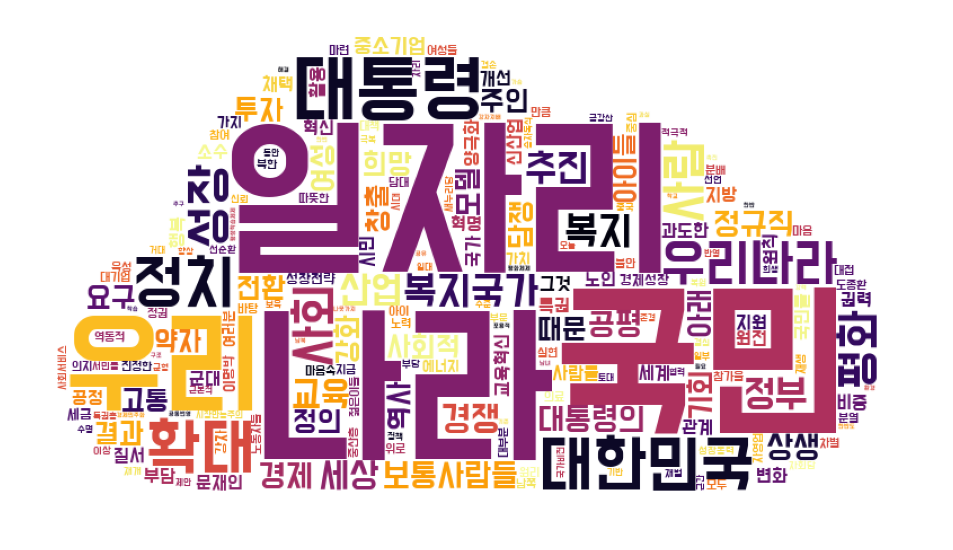

In [37]:
# wc 만들기
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
background_color = 'white',
mask = img,
colormap = 'inferno') # 컬러맵 설정
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [38]:
# 데이터 불러오기
# naver 뉴스 댓글 파일
df = pd.read_csv('Data2/news_comment_BTS.csv', encoding='UTF-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [39]:
# 불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex=True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [41]:
# 꼬꼬마 형태소 분석기로 명사 추출
nouns = df['reply'].apply(kkma.nouns)
nouns = nouns.explode() #한 행에 한 단어만 들어가도록 함
df_word = pd.DataFrame({'word' : nouns})
df_word.head()

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트


In [42]:
df_word['count'] = df_word['word'].str.len()
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [43]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
# 빈도표 만들기
df_word = df_word.groupby('word', as_index=False) \
.agg(n = ('word', 'count')) \
.sort_values('n', ascending=False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


<AxesSubplot:xlabel='n', ylabel='word'>

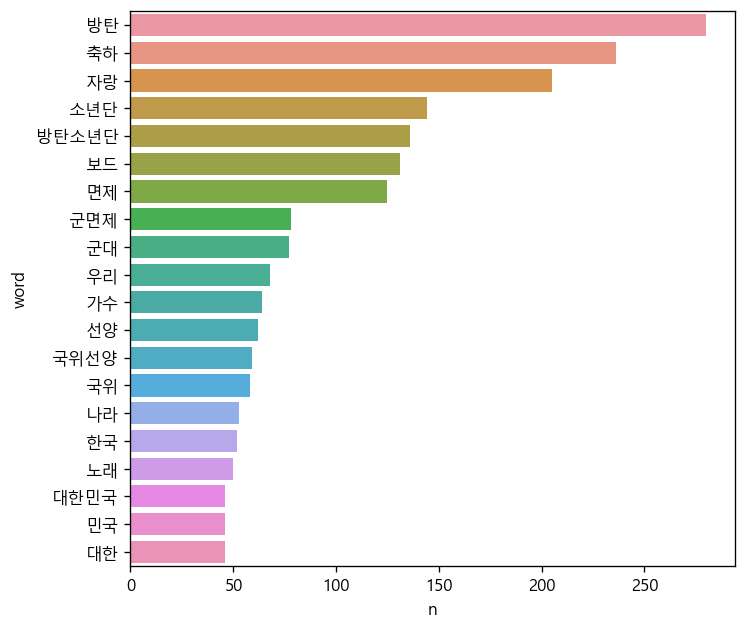

In [44]:
top20 = df_word.head(20)
# 가로 세로 크기 결정
plt.rcParams.update({'figure.figsize' : [6.5, 6]})
# 막대 그래프 만들기
sns.barplot(data=top20, y='word', x='n')

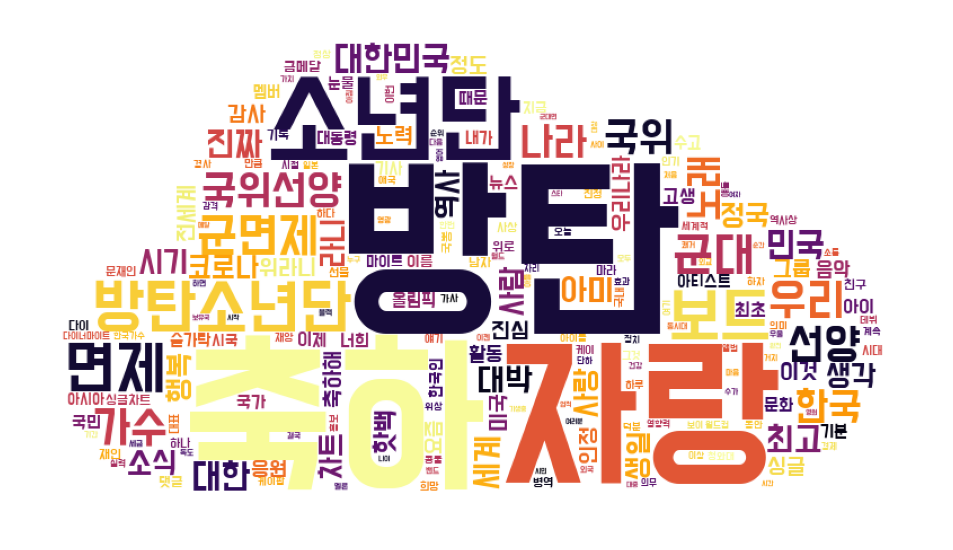

In [45]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
# wc 만들기
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
background_color = 'white',
mask = img,
colormap = 'inferno')
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [59]:
#data 불러오기
song = open('Data2/iur.txt', encoding = 'UTF-8').read()
#한글 외 문자 제거
song = re.sub('[^가-힣]', ' ', song)
nouns = hannanum.nouns(song)
df_word = pd.DataFrame( {'word' : nouns})
# 글자 수(count) 파생 변수 추가
df_word['word_n'] = df_word['word'].str.len()
# 단어 중 2글자 이상의 단어만 남기기
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')
# 단어 빈도 구하기
df_word = df_word.groupby('word', as_index=False) \
.agg(n = ('word', 'count')) \
.sort_values('n', ascending=False)
df_word

,word,n
70,우리,6
45,사랑,5
14,꽃잎,3
64,엄지손가락,3
6,그대,3
...,...,...
36,미묘한,1
35,머리,1
34,말풍선,1
33,마음속,1


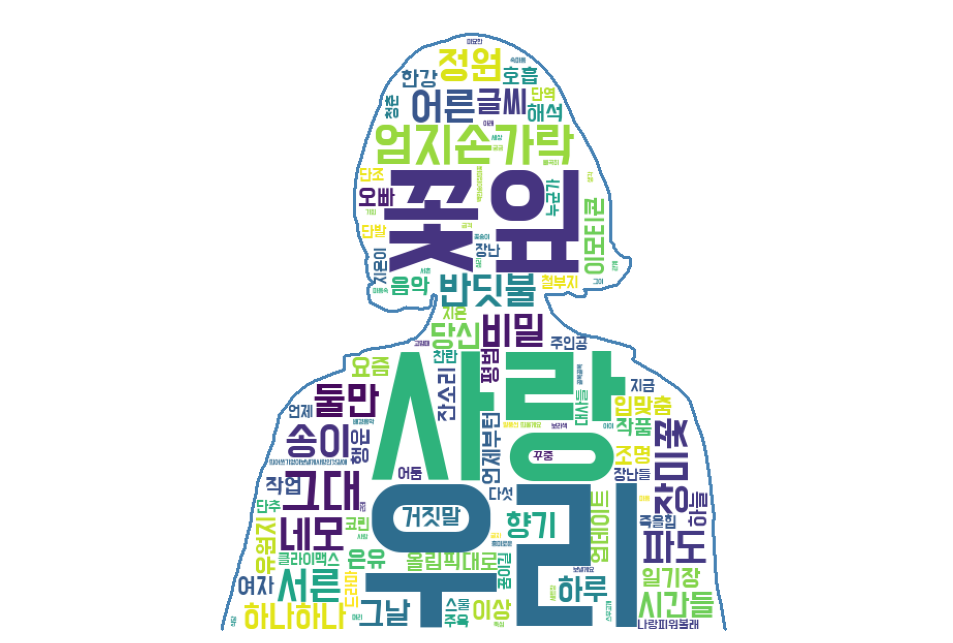

In [60]:
icon = PIL.Image.open('Data2/pngegg.png')
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
#노란 캔버스 만들기 (붙이려는 이미지)
yellow = PIL.Image.new('RGB', icon.size, (255, 255, 0))
# image 두개를 붙이는 방법
#원래 이미지 : playground
#자르고자 하는 img: dog
#자르고 싶은 모양의 mask : dogshape
#playground.paste(dog, dogshape)
#1) 노란색 캔버스를 구름 모양으로 mask 하여, 생성된 노란색 구름을 하얀 캔버스에 붙임
img.paste(yellow, icon)
#2) 첫번째 파라미터인 icon(검정색 구름 image를(cloud.png))를 두번째 파라미터인 icon 이
#하얀색 캔버스(img)에 붙임
#img.show()
#icon.show()
#img.paste(icon, icon)
#img.show()

# mask 파일 생성
img = np.array(img)

dic_word = df_word.set_index('word').to_dict()['n']
# wc 만들기
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
contour_width=3, # 테두리 굵기
contour_color='steelblue', # 테두리 색
background_color = 'white',
mask = img) # 배경으로 사용할 이미지

# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)